# Data Downloading from Yahoo Finance

In [1]:
import yfinance as yf
import pandas as pd
import os

# -----------------------------
# 1. Date range
# -----------------------------
start_date = "2019-01-01"
end_date = "2024-12-31"

# -----------------------------
# 2. Download data
# -----------------------------
data = yf.download(
    ["^GSPC", "BTC-USD", "ETH-USD"],
    start=start_date,
    end=end_date,
    auto_adjust=False  # keep Adj Close
)

# -----------------------------
# 3. Extract Adjusted Close
# -----------------------------
adj_close = data["Adj Close"].copy()

# -----------------------------
# 4. Rename columns
# -----------------------------
adj_close = adj_close.rename(columns={
    "^GSPC": "SP500",
    "BTC-USD": "BTC",
    "ETH-USD": "ETH"
})

# -----------------------------
# 5. Clean & format
# -----------------------------
adj_close = adj_close.dropna()
adj_close = adj_close.reset_index()
adj_close["Date"] = adj_close["Date"].dt.strftime("%d/%m/%Y")

# -----------------------------
# 6. Final structure
# -----------------------------
prices = adj_close[["Date", "SP500", "BTC", "ETH"]]

# -----------------------------
# 7. SAVE FILE IN GOOGLE COLAB
# -----------------------------
file_name = "Daily RW to test python.csv"
prices.to_csv(file_name, index=False)

# -----------------------------
# 8. CONFIRM FILE EXISTS
# -----------------------------
print("File saved:", file_name)
print("Files in /content:")
print(os.listdir("/content"))

# -----------------------------
# 9. Preview data
# -----------------------------
prices.head()


[*********************100%***********************]  3 of 3 completed

File saved: Daily RW to test python.csv
Files in /content:
['.config', 'Daily RW to test python.csv', 'sample_data']


Ticker,Date,SP500,BTC,ETH
0,02/01/2019,2510.030029,3943.409424,155.047684
1,03/01/2019,2447.889893,3836.741211,149.135010
2,04/01/2019,2531.939941,3857.717529,154.581940
3,07/01/2019,2549.689941,4025.248291,151.699219
4,08/01/2019,2574.409912,4030.847900,150.359634


#Descriptive Statistics
(Descriptive Statistics of return)

In [ ]:
# use this one

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, mode

# Function to calculate log returns
def calculate_log_returns(prices):
    return np.log(prices / prices.shift(1)).dropna()

# Load and preprocess data
data = pd.read_csv(
    "Daily RW to test python.csv",
    parse_dates=['Date '],  # Match exact column name with space
    dayfirst=True           # Critical for DD/MM/YYYY format
)
data.columns = data.columns.str.strip()  # Clean column names
data.set_index('Date', inplace=True)     # Set cleaned 'Date' as index

# Select assets and compute log returns
assets = ['BTC', 'ETH', 'SP500']
prices = data[assets].dropna()
log_returns = calculate_log_returns(prices)

# Calculate required statistics
statistics = {
    'Mean': log_returns.mean(),
    'Standard Error': log_returns.sem(),  # Standard Error of Mean
    'Median': log_returns.median(),
    'Mode': log_returns.apply(lambda x: mode(x, keepdims=False).mode),
    'Standard Deviation': log_returns.std(),
    'Sample Variance': log_returns.var(),
    'Kurtosis': log_returns.kurtosis(),  # Pandas kurtosis matches Excel (excess)
    'Skewness': log_returns.apply(skew),
    'Range': log_returns.max() - log_returns.min(),
    'Minimum': log_returns.min(),
    'Maximum': log_returns.max(),
    'Sum': log_returns.sum(),
    'Count': log_returns.count()
}

# Create descriptive statistics DataFrame with statistics as rows
desc_stats = pd.DataFrame(statistics).T.round(4)

# Reorder rows to match requested format
desired_order = [
    'Mean', 'Standard Error', 'Median', 'Mode', 'Standard Deviation',
    'Sample Variance', 'Kurtosis', 'Skewness', 'Range',
    'Minimum', 'Maximum', 'Sum', 'Count'
]
desc_stats = desc_stats.loc[desired_order]

# Transpose to get assets as rows and statistics as columns
desc_stats_transposed = desc_stats.T

# Save to CSV with statistics as column headers
desc_stats_transposed.to_csv('descriptive_statistics.csv', float_format='%.4f')

# Print results with statistics as column headers
print("Descriptive Statistics (Daily Log Returns):")
print(desc_stats_transposed)

Descriptive Statistics (Daily Log Returns):
         Mean  Standard Error  Median   Mode  Standard Deviation  \
BTC    0.0020          0.0011  0.0012 -0.494              0.0418   
ETH    0.0020          0.0013  0.0008  0.000              0.0531   
SP500  0.0005          0.0003  0.0006  0.000              0.0125   

       Sample Variance  Kurtosis  Skewness   Range  Minimum  Maximum     Sum  \
BTC             0.0018   15.6028   -1.1105  0.7021  -0.4940   0.2081  3.1955   
ETH             0.0028   13.4161   -0.9011  0.9307  -0.5756   0.3551  3.1713   
SP500           0.0002   15.9379   -0.8637  0.2173  -0.1277   0.0897  0.8528   

        Count  
BTC    1565.0  
ETH    1565.0  
SP500  1565.0  


# P testing

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, mode, jarque_bera

# Function to calculate log returns
def calculate_log_returns(prices):
    return np.log(prices / prices.shift(1)).dropna()

# Load and preprocess data
data = pd.read_csv(
    "Daily RW to test python.csv",
    parse_dates=['Date '],  # Match exact column name with space
    dayfirst=True           # Critical for DD/MM/YYYY format
)
data.columns = data.columns.str.strip()  # Clean column names
data.set_index('Date', inplace=True)     # Set cleaned 'Date' as index

# Select assets and compute log returns
assets = ['BTC', 'ETH', 'SP500']
prices = data[assets].dropna()
log_returns = calculate_log_returns(prices)

# Calculate required statistics
statistics = {
    'Mean': log_returns.mean(),
    'Standard Error': log_returns.sem(),  # Standard Error of Mean
    'Median': log_returns.median(),
    'Mode': log_returns.apply(lambda x: mode(x, keepdims=False).mode),
    'Standard Deviation': log_returns.std(),
    'Sample Variance': log_returns.var(),
    'Kurtosis': kurtosis(log_returns, fisher=False),  # Pearson kurtosis (not excess)
    'Skewness': log_returns.apply(skew),
    'Range': log_returns.max() - log_returns.min(),
    'Minimum': log_returns.min(),
    'Maximum': log_returns.max(),
    'Sum': log_returns.sum(),
    'Count': log_returns.count(),
    # New Jarque-Bera statistics
    'JB Statistic': log_returns.apply(lambda x: jarque_bera(x)[0]),
    'JB p-value': log_returns.apply(lambda x: jarque_bera(x)[1])
}

# Create descriptive statistics DataFrame with statistics as rows
desc_stats = pd.DataFrame(statistics).T

# Reorder rows to match requested format
desired_order = [
    'Mean', 'Standard Error', 'Median', 'Mode', 'Standard Deviation',
    'Sample Variance', 'Kurtosis', 'Skewness', 'JB Statistic', 'JB p-value',
    'Range', 'Minimum', 'Maximum', 'Sum', 'Count'
]
desc_stats = desc_stats.loc[desired_order]

# Format numbers for better presentation
def format_numbers(value):
    if isinstance(value, (int, np.integer)):
        return f"{value}"
    elif abs(value) > 1000:
        return f"{value:,.1f}"
    elif abs(value) < 0.0001:
        return f"{value:.2e}"
    else:
        return f"{value:.4f}"

# Create formatted version for display
desc_stats_formatted = desc_stats.copy()
for col in desc_stats_formatted.columns:
    desc_stats_formatted[col] = desc_stats_formatted[col].apply(format_numbers)

# Special formatting for JB p-value
desc_stats_formatted.loc['JB p-value'] = desc_stats.loc['JB p-value'].apply(
    lambda x: "<0.0001" if x < 0.0001 else f"{x:.6f}"
)

# Transpose to get assets as rows and statistics as columns
desc_stats_transposed = desc_stats.T
desc_stats_formatted_transposed = desc_stats_formatted.T

# Save to CSV and Excel
# 1. Raw numerical data (for calculations)
desc_stats_transposed.to_csv('descriptive_statistics_raw.csv')
desc_stats_transposed.to_excel('descriptive_statistics_raw.xlsx')

# 2. Formatted data (for presentation)
desc_stats_formatted_transposed.to_csv('descriptive_statistics_formatted.csv')
desc_stats_formatted_transposed.to_excel('descriptive_statistics_formatted.xlsx')

# Print formatted results
print("="*80)
print("Formatted Descriptive Statistics (for Thesis Presentation)")
print("="*80)
print(desc_stats_formatted_transposed)

print("\n" + "="*80)
print("Raw Numerical Values (for Verification)")
print("="*80)
print(desc_stats_transposed)

Formatted Descriptive Statistics (for Thesis Presentation)
         Mean Standard Error  Median      Mode Standard Deviation  \
BTC    0.0020         0.0011  0.0012   -0.4940             0.0418   
ETH    0.0020         0.0013  0.0008  0.00e+00             0.0531   
SP500  0.0005         0.0003  0.0006  0.00e+00             0.0125   

      Sample Variance Kurtosis Skewness JB Statistic JB p-value   Range  \
BTC            0.0018  18.5492  -1.1105     16,087.6    <0.0001  0.7021   
ETH            0.0028  16.3694  -0.9011     11,867.2    <0.0001  0.9307   
SP500          0.0002  18.8832  -0.8637     16,645.1    <0.0001  0.2173   

       Minimum Maximum     Sum    Count  
BTC    -0.4940  0.2081  3.1955  1,565.0  
ETH    -0.5756  0.3551  3.1713  1,565.0  
SP500  -0.1277  0.0897  0.8528  1,565.0  

Raw Numerical Values (for Verification)
           Mean  Standard Error    Median      Mode  Standard Deviation  \
BTC    0.002042        0.001057  0.001198 -0.493969            0.041834   
ETH 

#Market Regions Classifiaction using the standard 20% peak-to-trough drawdown rule (Bull Vs Bear)
Using Price Data - "Fixed-Peak Trough Recovery Method"

/tmp/ipython-input-44544211.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Bull' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[mask, 'Accurate_Phase'] = phase['Phase']


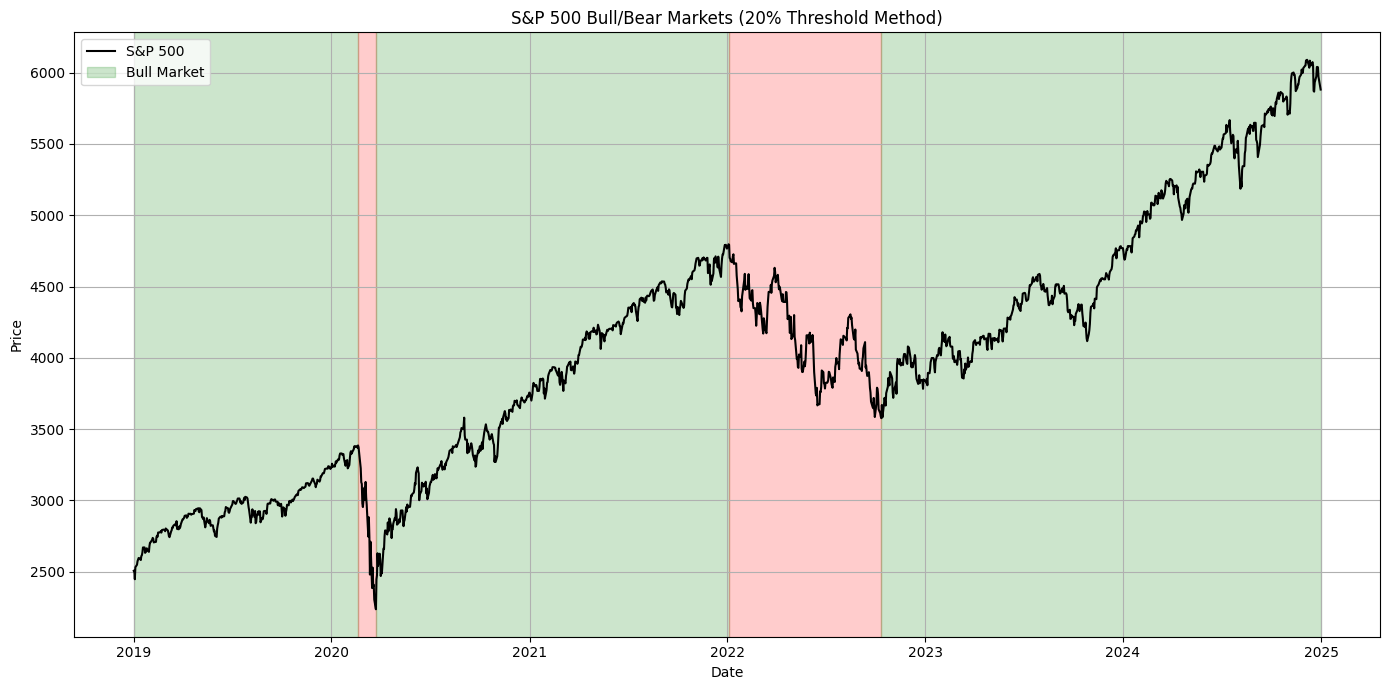

Validated Market Phases:
  Phase      Start        End  Start_Price  End_Price  Duration  Pct_Change
0  Bull 2019-01-01 2020-02-19      2506.85    3386.15       414   35.075892
1  Bear 2020-02-19 2020-03-23      3386.15    2237.40        33  -33.924959
2  Bull 2020-03-23 2022-01-03      2237.40    4796.56       651  114.380978
3  Bear 2022-01-03 2022-10-12      4796.56    3577.03       282  -25.425096
4  Bull 2022-10-12 2024-12-31      3577.03    5881.63       811   64.427752


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and clean data
data = pd.read_csv('Daily RW to test python.csv')
data.columns = data.columns.str.strip()

# Convert dates and sort
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')
data = data.sort_values('Date').reset_index(drop=True)
data['SP500'] = pd.to_numeric(data['SP500'], errors='coerce')
data = data.dropna(subset=['Date', 'SP500']).copy()

# Track market cycles
data['Peak'] = data['SP500'].cummax()
data['Trough'] = np.nan
data['Market_Phase'] = 'Bull'

# Initialize tracking variables
current_phase = 'Bull'
current_peak = data.iloc[0]['SP500']
current_trough = None
phase_start_date = data.iloc[0]['Date']
phase_start_price = data.iloc[0]['SP500']
phases = []

for index, row in data.iterrows():
    # Update cumulative peak
    if row['SP500'] > current_peak:
        current_peak = row['SP500']

    if current_phase == 'Bull':
        drawdown = (row['SP500'] - current_peak) / current_peak
        if drawdown <= -0.20:
            # Bear market starts at the date when the peak was reached.
            bear_start_date = pd.to_datetime(data[data['SP500'] == current_peak]['Date'].values[-1])
            phases.append({
                'Phase': 'Bull',
                'Start': phase_start_date,
                'End': bear_start_date,
                'Start_Price': phase_start_price,
                'End_Price': current_peak,
                'Duration': (bear_start_date - phase_start_date).days
            })
            current_phase = 'Bear'
            phase_start_date = bear_start_date
            phase_start_price = current_peak
            current_trough = row['SP500']

    elif current_phase == 'Bear':
        current_trough = min(current_trough, row['SP500'])
        recovery_level = current_trough * 1.20

        if row['SP500'] >= recovery_level:
            # Bull market starts at the date corresponding to the current trough.
            trough_date = pd.to_datetime(data[data['SP500'] == current_trough]['Date'].values[-1])
            phases.append({
                'Phase': 'Bear',
                'Start': phase_start_date,
                'End': trough_date,
                'Start_Price': phase_start_price,
                'End_Price': current_trough,
                'Duration': (trough_date - phase_start_date).days
            })
            current_phase = 'Bull'
            phase_start_date = trough_date
            phase_start_price = current_trough
            current_peak = row['SP500']

# Add final phase using the last available date
phases.append({
    'Phase': current_phase,
    'Start': phase_start_date,
    'End': data.iloc[-1]['Date'],
    'Start_Price': phase_start_price,
    'End_Price': data.iloc[-1]['SP500'],
    'Duration': (data.iloc[-1]['Date'] - phase_start_date).days
})

# Create phase DataFrame and calculate % change for each phase
phase_df = pd.DataFrame(phases)
phase_df['Pct_Change'] = ((phase_df['End_Price'] - phase_df['Start_Price']) / phase_df['Start_Price']) * 100

# Merge phase labels back to daily data for plotting
data['Accurate_Phase'] = np.nan
for _, phase in phase_df.iterrows():
    mask = (data['Date'] >= phase['Start']) & (data['Date'] <= phase['End'])
    data.loc[mask, 'Accurate_Phase'] = phase['Phase']

# Plot the S&P 500 with market phases colored
# Plotting with proper phase shading
plt.figure(figsize=(14, 7))

# Plot full price history
plt.plot(data['Date'], data['SP500'], color='black', label='S&P 500')

# Shade bull/bear markets
for _, phase in phase_df.iterrows():
    if phase['Phase'] == 'Bull':
        color = 'green'
    else:
        color = 'red'

    plt.axvspan(
        phase['Start'],
        phase['End'],
        alpha=0.2,
        color=color,
        label=f"{phase['Phase']} Market" if _ == 0 else ""
    )

plt.title('S&P 500 Bull/Bear Markets (20% Threshold Method)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the phase summary
print("Validated Market Phases:")
print(phase_df[['Phase', 'Start', 'End', 'Start_Price', 'End_Price', 'Duration', 'Pct_Change']])


# Save the Market phase summary to CSV

In [ ]:
# Save the Market phase summary to CSV
phase_df.to_csv('detected_market_phases.csv', index=False)
print("✅ Market phases saved to 'detected_market_phases.csv'")

✅ Market phases saved to 'detected_market_phases.csv'


"Dynamic Trough Tracking Method"

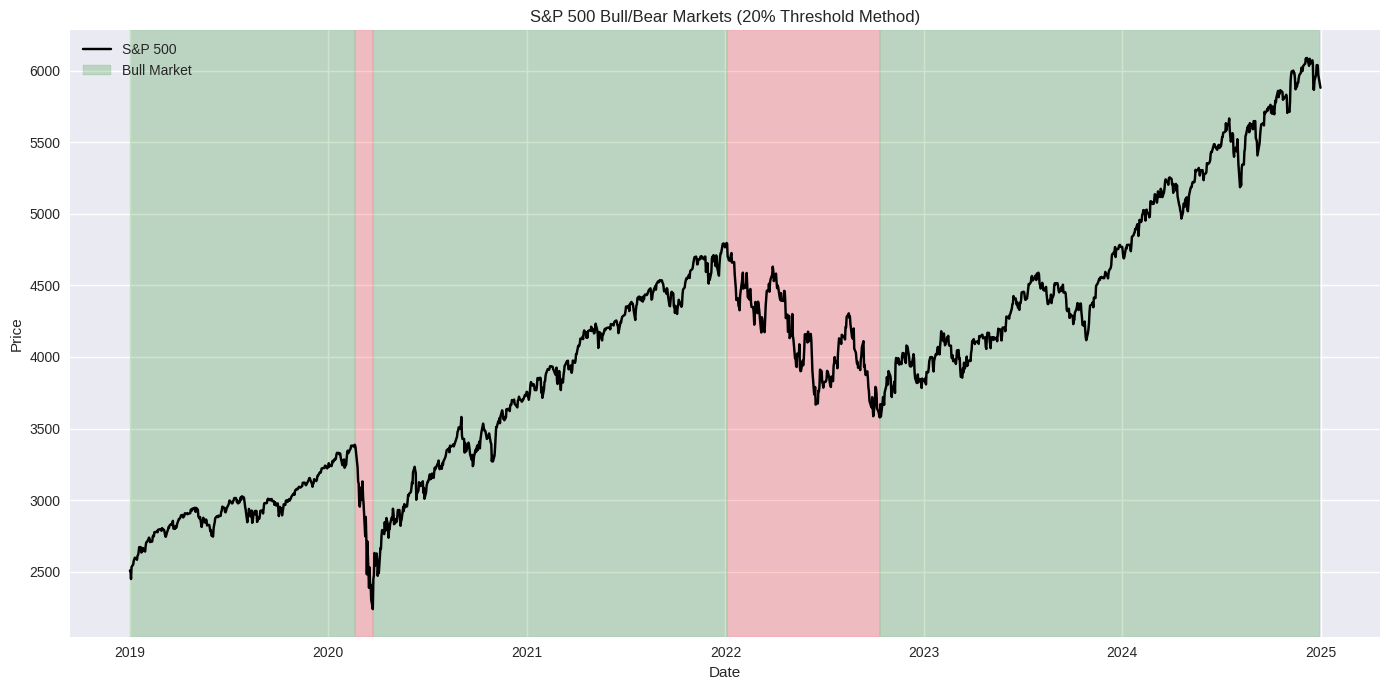

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and clean data
data = pd.read_csv('Daily RW to test python.csv')
data.columns = data.columns.str.strip()
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')
data = data.sort_values('Date').reset_index(drop=True)
data['SP500'] = pd.to_numeric(data['SP500'], errors='coerce')
data = data.dropna(subset=['Date', 'SP500']).copy()

# Initialize variables for regime classification
data['Peak'] = data['SP500'].cummax()
data['Drawdown'] = (data['SP500'] - data['Peak']) / data['Peak']
bear_market = data['Drawdown'] <= -0.20

# Track bull/bear phases with correct trough identification
phases = []
current_phase = 'Bull'
current_peak = data.iloc[0]['SP500']
current_trough = current_peak
phase_start_date = data.iloc[0]['Date']
phase_start_price = data.iloc[0]['SP500']  # Added missing initialization

for index, row in data.iterrows():
    # Update peak and trough
    if row['SP500'] > current_peak:
        current_peak = row['SP500']
    if row['SP500'] < current_trough:
        current_trough = row['SP500']

    # Check for phase transitions
    if current_phase == 'Bull':
        drawdown = (row['SP500'] - current_peak) / current_peak
        if drawdown <= -0.20:
            # Bear market starts at the peak date
            bear_start_date = data[data['SP500'] == current_peak]['Date'].iloc[-1]  # Use .iloc[-1]
            phases.append({
                'Phase': 'Bull',
                'Start': phase_start_date,
                'End': bear_start_date,
                'Start_Price': phase_start_price,
                'End_Price': current_peak,
                'Duration': (bear_start_date - phase_start_date).days
            })
            current_phase = 'Bear'
            phase_start_date = bear_start_date
            phase_start_price = current_peak
            current_trough = row['SP500']
    elif current_phase == 'Bear':
        recovery = (row['SP500'] - current_trough) / current_trough
        if recovery >= 0.20:
            # Bull market starts at trough date
            bull_start_date = data[data['SP500'] == current_trough]['Date'].iloc[-1]  # Use .iloc[-1]
            phases.append({
                'Phase': 'Bear',
                'Start': phase_start_date,
                'End': bull_start_date,
                'Start_Price': phase_start_price,
                'End_Price': current_trough,
                'Duration': (bull_start_date - phase_start_date).days  # Fixed
            })
            current_phase = 'Bull'
            phase_start_date = bull_start_date
            phase_start_price = current_trough
            current_peak = row['SP500']

# Add final phase
phases.append({
    'Phase': current_phase,
    'Start': phase_start_date,
    'End': data.iloc[-1]['Date'],
    'Start_Price': phase_start_price,
    'End_Price': data.iloc[-1]['SP500'],
    'Duration': (data.iloc[-1]['Date'] - phase_start_date).days
})

phase_df = pd.DataFrame(phases)
phase_df['Pct_Change'] = ((phase_df['End_Price'] - phase_df['Start_Price']) / phase_df['Start_Price']) * 100

# Plot the S&P 500 with market phases colored
plt.figure(figsize=(14, 7))

# Plot full price history
plt.plot(data['Date'], data['SP500'], color='black', label='S&P 500')

# Shade bull/bear markets
for i, phase in phase_df.iterrows():
    color = 'green' if phase['Phase'] == 'Bull' else 'red'
    plt.axvspan(
        phase['Start'],
        phase['End'],
        alpha=0.2,
        color=color,
        label=f"{phase['Phase']} Market" if i == 0 else ""
    )

plt.title('S&P 500 Bull/Bear Markets (20% Threshold Method)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()

# 👉 Save the figure before showing
plt.savefig("sp500_phases.png", dpi=300, bbox_inches="tight")  # high-quality PNG
# plt.savefig("sp500_phases.pdf", bbox_inches="tight")        # or PDF for vector format

plt.show()

**Saving CSV file of (price data based on market regimes)Optional
Pooled bull Markets and
Each Bull Markets**

In [ ]:
import pandas as pd

# Load the market phases
phases_df = pd.read_csv("detected_market_phases.csv")
phases_df['Start'] = pd.to_datetime(phases_df['Start'])
phases_df['End'] = pd.to_datetime(phases_df['End'])

# Filter only bull phases
bull_phases = phases_df[phases_df['Phase'] == 'Bull']

# Load the daily market data
daily_df = pd.read_csv("Daily RW to test python.csv")

# Clean column names (remove leading/trailing spaces)
daily_df.columns = daily_df.columns.str.strip()

# Parse the date column (assuming day-first format like 01/01/2019)
daily_df['Date'] = pd.to_datetime(daily_df['Date'], dayfirst=True, errors='coerce')

# Create an empty DataFrame for pooled bull data
pooled_bull_df = pd.DataFrame()

# Loop through each bull phase and extract corresponding data
for i, row in bull_phases.iterrows():
    phase_data = daily_df[(daily_df['Date'] >= row['Start']) & (daily_df['Date'] <= row['End'])]

    # Save individual bull phase
    phase_data.to_csv(f"bull_phase_{i+1}.csv", index=False)

    # Add to pooled data
    pooled_bull_df = pd.concat([pooled_bull_df, phase_data])

# Save combined bull data
pooled_bull_df.to_csv("bull_phases_combined.csv", index=False)

print("✅ Cleaned column names, parsed dates, and saved all bull phase files.")


✅ Cleaned column names, parsed dates, and saved all bull phase files.


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, shapiro

# Step 1: Load CSV with correct column name 'Date ' (including trailing space)
data = pd.read_csv(
    "Daily RW to test python.csv",
    parse_dates=['Date '],  # Match the exact column name with space
    dayfirst=True  # Critical for DD/MM/YYYY format
)

# Step 2: Clean column names (remove trailing space)
data.columns = data.columns.str.strip()

# Step 3: Set cleaned 'Date' column as index
data.set_index('Date', inplace=True)  # Now uses 'Date' without trailing space

# Step 4: Select assets and compute daily log returns
assets = ['BTC', 'ETH', 'SP500']
prices = data[assets].dropna()
log_returns = np.log(prices / prices.shift(1)).dropna()

# Step 5: Calculate descriptive statistics
desc_stats = pd.DataFrame({
    'Mean': log_returns.apply(np.mean),
    'Std Dev': log_returns.apply(np.std),
    'Skewness': log_returns.apply(skew),
    'Kurtosis (Pearson)': log_returns.apply(kurtosis) + 3,
    'Shapiro-Wilk p-value': log_returns.apply(lambda x: shapiro(x)[1])
}).round(4)

print("Descriptive Statistics (Daily Log Returns):")
print(desc_stats)

Descriptive Statistics (Daily Log Returns):
         Mean  Std Dev  Skewness  Kurtosis (Pearson)  Shapiro-Wilk p-value
BTC    0.0020   0.0418   -1.1105             18.5492                   0.0
ETH    0.0020   0.0531   -0.9011             16.3694                   0.0
SP500  0.0005   0.0125   -0.8637             18.8832                   0.0


Save CSV file by changing price Data into Logreturn

In [ ]:
import pandas as pd
import numpy as np

# === Step 1: Load the price data ===
file_name = "Daily RW to test python.csv"  # Your actual file name

# Load raw data first (don't parse dates yet)
data = pd.read_csv(file_name)

# === Step 2: Clean column names (remove spaces etc.) ===
data.columns = data.columns.str.strip()

# === Step 3: Parse and sort the date column ===
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')
data = data.sort_values('Date').set_index('Date')

# === Step 4: Calculate log returns ===
log_returns = np.log(data / data.shift(1))

# === Step 5: Drop any missing rows from the shift or conversion ===
log_returns.dropna(inplace=True)

# === Step 6: Save to CSV ===
log_returns.to_csv("Daily_Log_Returns.csv")
print("✅ Log return data saved to 'Daily_Log_Returns.csv'")


✅ Log return data saved to 'Daily_Log_Returns.csv'


In [ ]:
data = pd.read_csv("Daily_Log_Returns.csv")
print("Columns in your CSV:", data.columns.tolist())

Columns in your CSV: ['Date', 'SP500', 'BTC', 'ETH']


*Total number of observations (log returns) across all bull market*


In [ ]:
# Load your data
market_phases = pd.read_csv('detected_market_phases.csv', parse_dates=['Start', 'End'])
return_data = pd.read_csv('Daily_Log_Returns.csv', parse_dates=['Date']).dropna()

# Function to calculate the total number of observations in bull markets
def count_bull_market_observations(market_phases, return_data):
    # Filter market phases for bull markets
    bull_phases = market_phases[market_phases['Phase'] == 'Bull']

    # Initialize a variable to store the total number of observations
    total_bull_observations = 0

    # Iterate through each bull market phase and count the observations
    for _, row in bull_phases.iterrows():
        mask = (return_data['Date'] >= row['Start']) & (return_data['Date'] <= row['End'])
        # Count the number of observations in this phase
        total_bull_observations += return_data[mask].shape[0]

    return total_bull_observations

# Get the total number of bull market observations
total_bull_obs = count_bull_market_observations(market_phases, return_data)

print(f"Total number of observations (log returns) across all bull markets: {total_bull_obs}")


Total number of observations (log returns) across all bull markets: 1342



# Hypothesis I
**Correlation**

# Eview Correlation Results areas below. ( Full Sample Size)

Spearman ( Full Sample Size)


![description](https://url.com/image.jpg)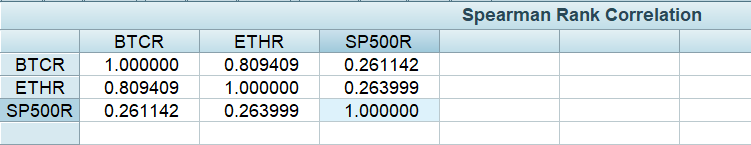

Eview Pearson Correlatio (1. Bull Market  2019-01-01  2020-02-19)

![Description](my_image.png)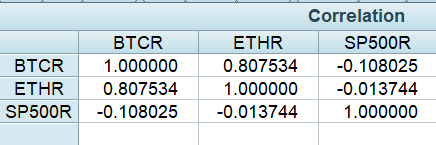

# 4.1 Time-varying correlations across market **Regimes**(Pearson and Spearman Correlation )

In [ ]:
import pandas as pd

# Load the log return data (not price data)
data = pd.read_csv(
    'Daily_Log_Returns.csv',  # The log return data file you saved earlier
    parse_dates=['Date'],     # Make sure the 'Date' column is parsed as a date
    dayfirst=True
)

# Clean column names (ensure no extra spaces or errors)
data.columns = data.columns.str.strip()

# Convert 'Date' column to datetime explicitly (in case it's still in string format)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# ✅ Load the dynamic market phases from CSV (created earlier)
market_phases = pd.read_csv('detected_market_phases.csv', parse_dates=['Start', 'End'])

# Convert 'Start' and 'End' columns to datetime if necessary (in case there are format issues)
market_phases['Start'] = pd.to_datetime(market_phases['Start'], errors='coerce')
market_phases['End'] = pd.to_datetime(market_phases['End'], errors='coerce')

# Calculate correlations for each market phase
results = []
for _, phase in market_phases.iterrows():
    # Create mask for dates within the market phase
    mask = (data['Date'] >= phase['Start']) & (data['Date'] <= phase['End'])
    phase_data = data[mask]

    # Drop rows with missing values in the target columns (returns of SP500, BTC, ETH)
    phase_data = phase_data[['SP500', 'BTC', 'ETH']].dropna()

    # Pearson correlation matrix (returns)
    pearson_corr = phase_data.corr(method='pearson')

    # Spearman correlation matrix (returns)
    spearman_corr = phase_data.corr(method='spearman')

    # Append the results for both Pearson and Spearman correlations
    results.append({
        'Phase': phase['Phase'],
        'Start': phase['Start'].strftime('%Y-%m-%d'),
        'End': phase['End'].strftime('%Y-%m-%d'),
        'BTC-S&P500_Pearson': pearson_corr.loc['BTC', 'SP500'],
        'ETH-S&P500_Pearson': pearson_corr.loc['ETH', 'SP500'],
        'BTC-ETH_Pearson': pearson_corr.loc['BTC', 'ETH'],
        'BTC-S&P500_Spearman': spearman_corr.loc['BTC', 'SP500'],
        'ETH-S&P500_Spearman': spearman_corr.loc['ETH', 'SP500'],
        'BTC-ETH_Spearman': spearman_corr.loc['BTC', 'ETH']
    })

# Final correlation results
results_df = pd.DataFrame(results)
print(results_df)

# ✅ Optionally: Save correlation results to CSV
results_df.to_csv('correlation_by_market_phase.csv', index=False)
print("✅ Correlation results saved to 'correlation_by_market_phase.csv'")


  Phase       Start         End  BTC-S&P500_Pearson  ETH-S&P500_Pearson  \
0  Bull  2019-01-01  2020-02-19           -0.108025           -0.013744   
1  Bear  2020-02-19  2020-03-23            0.603050            0.651912   
2  Bull  2020-03-23  2022-01-03            0.237509            0.221034   
3  Bear  2022-01-03  2022-10-12            0.561944            0.536821   
4  Bull  2022-10-12  2024-12-31            0.313874            0.350559   

   BTC-ETH_Pearson  BTC-S&P500_Spearman  ETH-S&P500_Spearman  BTC-ETH_Spearman  
0         0.807534            -0.047366            -0.047152          0.801844  
1         0.983259             0.399130             0.480000          0.917391  
2         0.761278             0.227467             0.223433          0.769137  
3         0.893268             0.558549             0.554964          0.884955  
4         0.849053             0.299146             0.296786          0.813457  
✅ Correlation results saved to 'correlation_by_market_phase.csv

# Figure ( Evolution of Correlation over Time)


Plot saved as correlation_evolution_improved.png


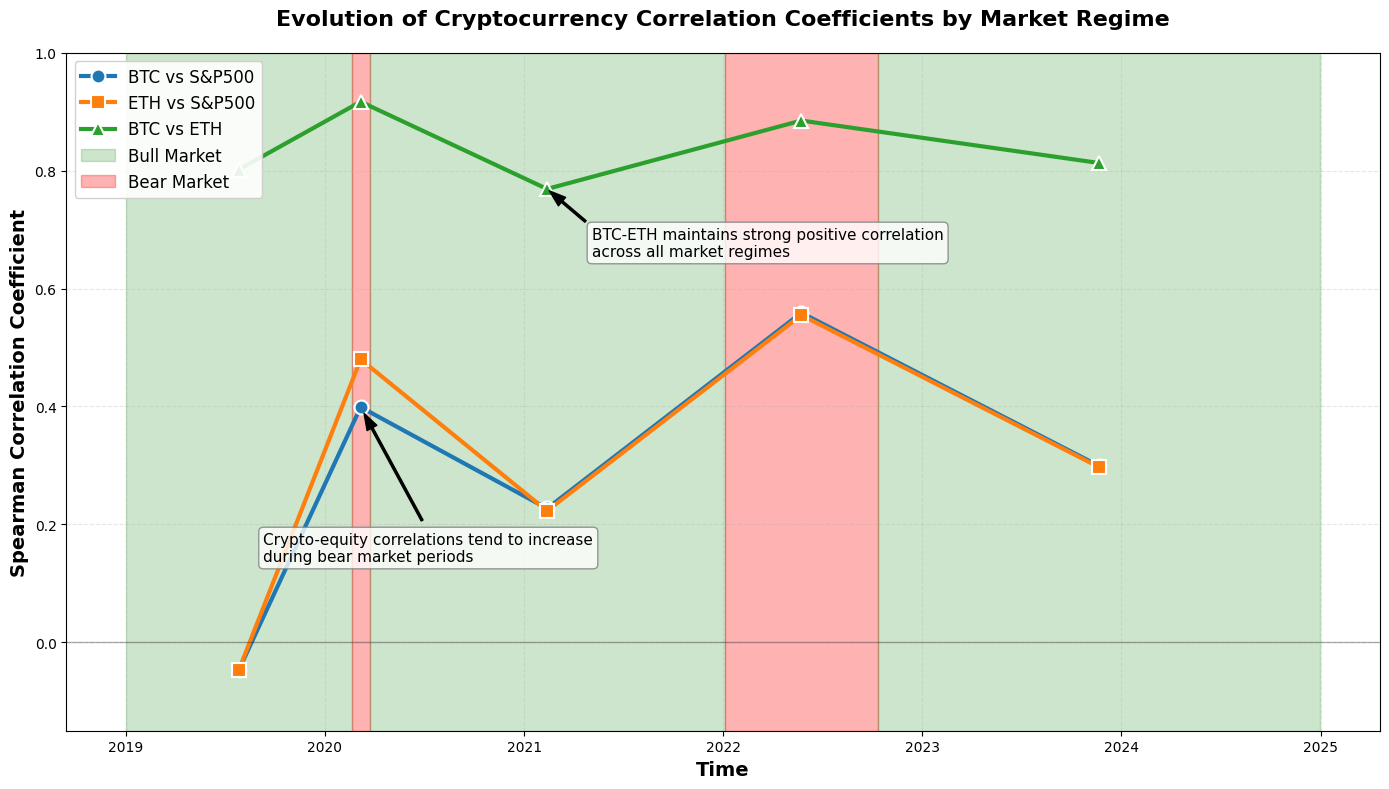

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime

def create_correlation_evolution_plot(correlation_data, save_path='correlation_evolution.png'):
    """
    Creates a clear time evolution plot of correlation coefficients with proper bull/bear market differentiation.

    Parameters:
    correlation_data: DataFrame with correlation results by market regime
    save_path: Path to save the PNG file
    """
    # Set up the figure with a professional style
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 8))

    # Convert dates to datetime for proper plotting
    correlation_data['Start_dt'] = pd.to_datetime(correlation_data['Start'], dayfirst=True)
    correlation_data['End_dt'] = pd.to_datetime(correlation_data['End'], dayfirst=True)
    correlation_data['Midpoint'] = correlation_data['Start_dt'] + (correlation_data['End_dt'] - correlation_data['Start_dt']) / 2

    # Define colors and markers for each series
    colors = {'BTC-S&P500': '#1f77b4', 'ETH-S&P500': '#ff7f0e', 'BTC-ETH': '#2ca02c'}
    markers = {'BTC-S&P500': 'o', 'ETH-S&P500': 's', 'BTC-ETH': '^'}
    labels = {'BTC-S&P500': 'BTC vs S&P500', 'ETH-S&P500': 'ETH vs S&P500', 'BTC-ETH': 'BTC vs ETH'}

    # Plot each correlation series with custom styling
    for series in ['BTC-S&P500', 'ETH-S&P500', 'BTC-ETH']:
        ax.plot(correlation_data['Midpoint'], correlation_data[series],
                marker=markers[series], linewidth=3, markersize=10,
                color=colors[series], label=labels[series], markeredgecolor='white',
                markeredgewidth=1.5)

    # Add shaded areas for market regimes with proper labeling
    for i, row in correlation_data.iterrows():
        if row['Phase'] == 'Bear':
            ax.axvspan(row['Start_dt'], row['End_dt'], alpha=0.3, color='red', label='Bear Market' if i == 1 else "")
        else:
            ax.axvspan(row['Start_dt'], row['End_dt'], alpha=0.2, color='green', label='Bull Market' if i == 0 else "")

    # Format the plot for better readability
    ax.set_xlabel('Time', fontsize=14, fontweight='bold')
    ax.set_ylabel('Spearman Correlation Coefficient', fontsize=14, fontweight='bold')
    ax.set_title('Evolution of Cryptocurrency Correlation Coefficients by Market Regime',
                 fontsize=16, fontweight='bold', pad=20)

    # Set y-axis limits to better show the correlation range
    ax.set_ylim(-0.15, 1.0)

    # Add a horizontal line at zero for reference
    ax.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)

    # Format x-axis with year labels
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())

    # Add grid for better readability
    ax.grid(True, alpha=0.3, linestyle='--')

    # Create a custom legend that doesn't duplicate entries
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicates
    ax.legend(by_label.values(), by_label.keys(), loc='upper left', fontsize=12, framealpha=0.9)

    # Add annotation for the high BTC-ETH correlation
    ax.annotate('BTC-ETH maintains strong positive correlation\nacross all market regimes',
                xy=(correlation_data['Midpoint'].iloc[2], correlation_data['BTC-ETH'].iloc[2]),
                xytext=(0.4, 0.7), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    # Add annotation for the bear market pattern
    ax.annotate('Crypto-equity correlations tend to increase\nduring bear market periods',
                xy=(correlation_data['Midpoint'].iloc[1], correlation_data['BTC-S&P500'].iloc[1]),
                xytext=(0.15, 0.25), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
                fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    # Adjust layout to prevent cutting off elements
    plt.tight_layout()

    # Save as high-quality PNG
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"Plot saved as {save_path}")

    plt.show()

    return fig

# Example usage with your data:
if __name__ == '__main__':
    # Your correlation data
    correlation_data = pd.DataFrame({
        'Phase': ['Bull', 'Bear', 'Bull', 'Bear', 'Bull'],
        'Start': ['01/01/2019', '19/02/2020', '23/03/2020', '03/01/2022', '12/10/2022'],
        'End': ['19/02/2020', '23/03/2020', '03/01/2022', '12/10/2022', '31/12/2024'],
        'BTC-S&P500': [-0.047, 0.399, 0.227, 0.559, 0.299],
        'ETH-S&P500': [-0.047, 0.480, 0.223, 0.555, 0.297],
        'BTC-ETH': [0.802, 0.917, 0.769, 0.885, 0.813]
    })

    # Create the visualization
    create_correlation_evolution_plot(correlation_data, 'correlation_evolution_improved.png')

# Comparison of Correlations between Bull and Bear Markets
**Hypothesis 1:"Are the correlations between BTC/ETH and the S&P 500 significantly lower during bull markets than during bear markets?"**


One Tail Test


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Step 1: Load data
returns = pd.read_csv('Daily_Log_Returns.csv', parse_dates=['Date'])
phases = pd.read_csv('detected_market_phases.csv', parse_dates=['Start','End'])

# Step 2: Combine all bull/bear periods
bull_data = pd.DataFrame()
bear_data = pd.DataFrame()

for _, row in phases.iterrows():
    mask = (returns['Date'] >= row['Start']) & (returns['Date'] <= row['End'])
    df = returns.loc[mask, ['SP500','BTC','ETH']].dropna()

    if row['Phase'] == 'Bull':
        bull_data = pd.concat([bull_data, df])
    else:
        bear_data = pd.concat([bear_data, df])

print(f"Bull days: {len(bull_data)}, Bear days: {len(bear_data)}")

# Step 3: Compute regime-wide Spearman correlations
bull_corr_btc = bull_data['SP500'].corr(bull_data['BTC'], method='spearman')
bear_corr_btc = bear_data['SP500'].corr(bear_data['BTC'], method='spearman')

bull_corr_eth = bull_data['SP500'].corr(bull_data['ETH'], method='spearman')
bear_corr_eth = bear_data['SP500'].corr(bear_data['ETH'], method='spearman')

# Step 4: Fisher Z-test function
def fisher_z_test(r_bull, r_bear, n_bull, n_bear):
    """One-tailed test for H₁: bull < bear"""
    r_bull = np.clip(r_bull, -0.9999, 0.9999)
    r_bear = np.clip(r_bear, -0.9999, 0.9999)

    z_bull = np.arctanh(r_bull)
    z_bear = np.arctanh(r_bear)

    se_diff = np.sqrt(1/(n_bull-3) + 1/(n_bear-3))
    z = (z_bull - z_bear) / se_diff
    p_value = norm.cdf(z)

    return z, p_value

# Step 5: Run tests
n_bull = len(bull_data)
n_bear = len(bear_data)

z_btc, p_btc = fisher_z_test(bull_corr_btc, bear_corr_btc, n_bull, n_bear)
z_eth, p_eth = fisher_z_test(bull_corr_eth, bear_corr_eth, n_bull, n_bear)

# Step 6: Report results
print("\nHypothesis 1 Test Results:")
print(f"BTC vs S&P 500:")
print(f" Bull ρ = {bull_corr_btc:.4f} (n={n_bull})")
print(f" Bear ρ = {bear_corr_btc:.4f} (n={n_bear})")
print(f" Fisher Z = {z_btc:.4f}, p = {p_btc:.6f}")
print(f" Conclusion: {'Supported ✅' if p_btc < 0.05 else 'Not supported ❌'}")

print(f"\nETH vs S&P 500:")
print(f" Bull ρ = {bull_corr_eth:.4f} (n={n_bull})")
print(f" Bear ρ = {bear_corr_eth:.4f} (n={n_bear})")
print(f" Fisher Z = {z_eth:.4f}, p = {p_eth:.6f}")
print(f" Conclusion: {'Supported ✅' if p_eth < 0.05 else 'Not supported ❌'}")


Bull days: 1342, Bear days: 227

Hypothesis 1 Test Results:
BTC vs S&P 500:
 Bull ρ = 0.2004 (n=1342)
 Bear ρ = 0.5142 (n=227)
 Fisher Z = -5.0598, p = 0.000000
 Conclusion: Supported ✅

ETH vs S&P 500:
 Bull ρ = 0.1997 (n=1342)
 Bear ρ = 0.5195 (n=227)
 Fisher Z = -5.1706, p = 0.000000
 Conclusion: Supported ✅


Two Tails test

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm, spearmanr

# Load data
market_phases = pd.read_csv('detected_market_phases.csv', parse_dates=['Start', 'End'])
return_data = pd.read_csv('Daily_Log_Returns.csv', parse_dates=['Date']).dropna()

# Pool data for all bull/bear phases
def pool_data(phases, return_data):
    pooled = pd.DataFrame()
    for _, row in phases.iterrows():
        mask = (return_data['Date'] >= row['Start']) & (return_data['Date'] <= row['End'])
        pooled = pd.concat([pooled, return_data.loc[mask]])
    return pooled

# Split returns into bull/bear periods
bull_returns = pool_data(market_phases[market_phases['Phase'] == 'Bull'], return_data)
bear_returns = pool_data(market_phases[market_phases['Phase'] == 'Bear'], return_data)

# Calculate Spearman correlations on POOLED data
def compute_correlation(data, asset):
    if len(data) == 0:
        return np.nan, 0
    corr, _ = spearmanr(data[asset], data['SP500'])
    return corr, len(data)

# For BTC
bull_corr_btc, n_bull_btc = compute_correlation(bull_returns, 'BTC')
bear_corr_btc, n_bear_btc = compute_correlation(bear_returns, 'BTC')

# For ETH
bull_corr_eth, n_bull_eth = compute_correlation(bull_returns, 'ETH')
bear_corr_eth, n_bear_eth = compute_correlation(bear_returns, 'ETH')

# Fisher's Z-test function (handles edge cases)
def fisher_z_test(r1, r2, n1, n2):
    r1 = np.clip(r1, -0.9999, 0.9999)  # Avoid ±1
    r2 = np.clip(r2, -0.9999, 0.9999)
    z1 = 0.5 * np.log((1 + r1) / (1 - r1))
    z2 = 0.5 * np.log((1 + r2) / (1 - r2))
    se = np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))
    z = (z1 - z2) / se
    p = 2 * (1 - norm.cdf(abs(z)))  # Two-tailed
    return z, p

# Run tests
z_btc, p_btc = fisher_z_test(bull_corr_btc, bear_corr_btc, n_bull_btc, n_bear_btc)
z_eth, p_eth = fisher_z_test(bull_corr_eth, bear_corr_eth, n_bull_eth, n_bear_eth)

# Print results
print("BTC vs S&P500:")
print(f"Bull corr: {bull_corr_btc:.3f} (n={n_bull_btc}), Bear corr: {bear_corr_btc:.3f} (n={n_bear_btc})")
print(f"Z = {z_btc:.3f}, p = {p_btc:.4f} {'✅' if p_btc < 0.05 else '❌'}")

print("\nETH vs S&P500:")
print(f"Bull corr: {bull_corr_eth:.3f} (n={n_bull_eth}), Bear corr: {bear_corr_eth:.3f} (n={n_bear_eth})")
print(f"Z = {z_eth:.3f}, p = {p_eth:.4f} {'✅' if p_eth < 0.05 else '❌'}")

BTC vs S&P500:
Bull corr: 0.200 (n=1342), Bear corr: 0.514 (n=227)
Z = -5.060, p = 0.0000 ✅

ETH vs S&P500:
Bull corr: 0.200 (n=1342), Bear corr: 0.519 (n=227)
Z = -5.171, p = 0.0000 ✅


Visualization for Above Result

#Figure .. Crypto-Equity Correlation by Market Regimes

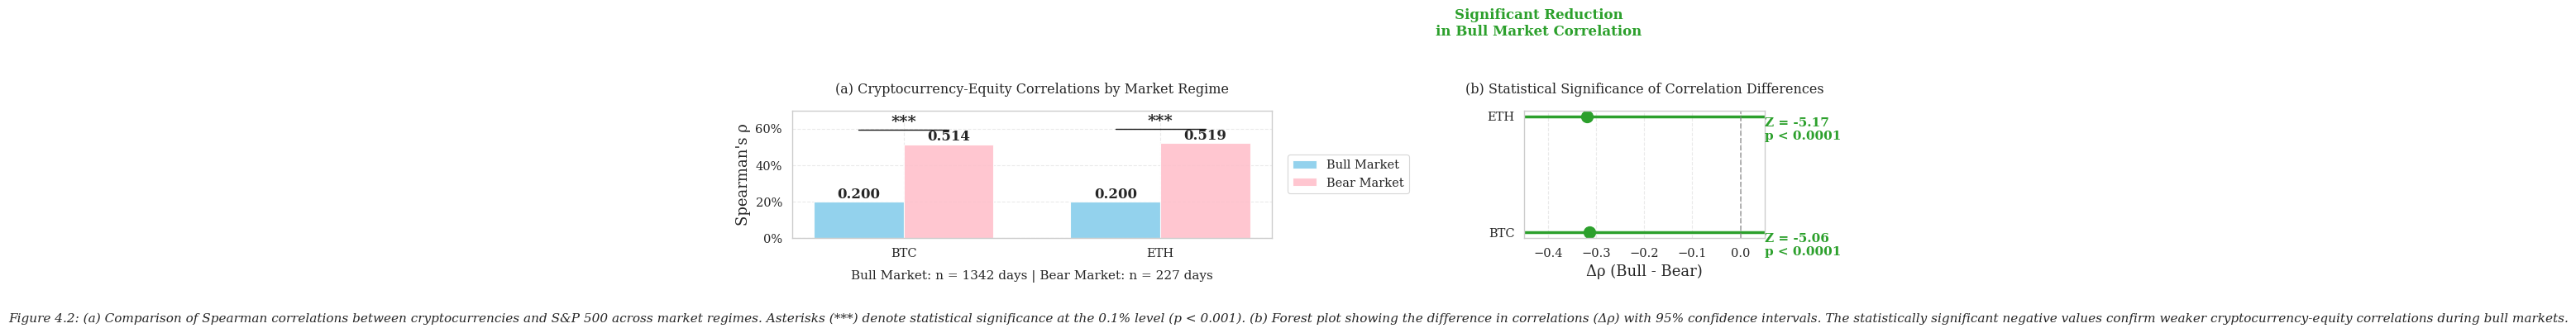

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Set academic plotting style
sns.set(style="whitegrid", context="paper", font_scale=1.2)
plt.rcParams["font.family"] = "serif"
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = "--"
plt.rcParams["grid.alpha"] = 0.4

# Results data (from your hypothesis testing)
assets = ["BTC", "ETH"]
bull_corrs = [0.2004, 0.1997]
bear_corrs = [0.5142, 0.5195]
z_scores = [-5.0598, -5.1706]
p_values = [0.000000, 0.000000]
n_bull = 1342
n_bear = 227

# Create figure with two subplots (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 1]})

# ------------------------------------------------------
# Plot 1: Correlation Comparison (Bar plot)
# ------------------------------------------------------
x = np.arange(len(assets))
width = 0.35

# Updated colors
bull_bars = ax1.bar(x - width/2, bull_corrs, width,
                    label='Bull Market', color='skyblue', alpha=0.9)
bear_bars = ax1.bar(x + width/2, bear_corrs, width,
                    label='Bear Market', color='pink', alpha=0.9)

# Add correlation values and significance marks
for i, (bull, bear) in enumerate(zip(bull_corrs, bear_corrs)):
    ax1.text(i - width/2, bull + 0.02, f'{bull:.3f}',
             ha='center', fontsize=12, fontweight='bold')
    ax1.text(i + width/2, bear + 0.02, f'{bear:.3f}',
             ha='center', fontsize=12, fontweight='bold')

    # Asterisk for significance (set above max bar height dynamically)
    y_star = max(bull, bear) + 0.08
    ax1.plot([i - width/2, i + width/2], [y_star, y_star], 'k-', lw=1)
    ax1.text(i, y_star + 0.02, "***", ha='center', fontsize=14, fontweight='bold')

# Axis formatting
ax1.set_title('(a) Cryptocurrency-Equity Correlations by Market Regime', pad=15)
ax1.set_ylabel("Spearman's ρ", fontsize=13)
ax1.set_ylim(0, 0.7)
ax1.set_xticks(x)
ax1.set_xticklabels(assets)
ax1.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=True)
ax1.yaxis.set_major_formatter(PercentFormatter(1.0))

# Sample size annotation (pushed lower to avoid overlap)
ax1.text(0.5, -0.25, f"Bull Market: n = {n_bull} days | Bear Market: n = {n_bear} days",
         ha='center', va='top', transform=ax1.transAxes, fontsize=11)

# ------------------------------------------------------
# Plot 2: Statistical Significance (Forest plot)
# ------------------------------------------------------
def fisher_ci(r, n, z=1.96):
    z_r = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    lower_z = z_r - z * se
    upper_z = z_r + z * se
    return np.tanh(lower_z), np.tanh(upper_z)

btc_ci = fisher_ci((bull_corrs[0] + bear_corrs[0])/2, n_bull + n_bear)
eth_ci = fisher_ci((bull_corrs[1] + bear_corrs[1])/2, n_bull + n_bear)
cis = [btc_ci, eth_ci]

# Plot effect sizes with error bars
for i, (z, p, ci) in enumerate(zip(z_scores, p_values, cis)):
    effect = bull_corrs[i] - bear_corrs[i]
    ax2.errorbar(
        effect, i,
        xerr=[[abs(effect - ci[0])], [abs(ci[1] - effect)]],
        fmt='o',
        color='#2ca02c',
        ecolor='#2ca02c',
        elinewidth=2.5,
        capsize=6,
        capthick=2.5,
        markersize=10
    )
    ax2.text(0.05, i - 0.2, f'Z = {z:.2f}\np < 0.0001',
             fontsize=11, fontweight='bold', color='#2ca02c')

# Formatting
ax2.axvline(0, color='gray', linestyle='--', alpha=0.7)
ax2.set_title('(b) Statistical Significance of Correlation Differences', pad=15)
ax2.set_xlabel("Δρ (Bull - Bear)", fontsize=13)
ax2.set_yticks(range(len(assets)))
ax2.set_yticklabels(assets)
ax2.set_xlim(-0.45, 0.05)
ax2.grid(False, axis='y')

ax2.text(-0.42, 1.7, "Significant Reduction\nin Bull Market Correlation",
         fontsize=12, ha='center', color='#2ca02c', fontweight='bold')

# ------------------------------------------------------
# Final formatting
# ------------------------------------------------------
plt.tight_layout(pad=2.0)
plt.subplots_adjust(wspace=0.7, bottom=0.18) # extra bottom space for caption

# Add figure caption
fig.text(0.5, 0.01,
         "Figure 4.2: (a) Comparison of Spearman correlations between cryptocurrencies and S&P 500 across market regimes. "
         "Asterisks (***) denote statistical significance at the 0.1% level (p < 0.001). "
         "(b) Forest plot showing the difference in correlations (Δρ) with 95% confidence intervals. "
         "The statistically significant negative values confirm weaker cryptocurrency-equity correlations during bull markets.",
         ha='center', fontsize=11, style='italic')

# Save and show
plt.savefig('hypothesis1_results.png', dpi=300, bbox_inches='tight')
plt.show()
